# Introduction

This is a notebook to work on a dataset of measurements of electric power consumption in one household. The dataset is available for download from the University of California, Irvine, machine learning repository (see link below)
https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

Some of the salient features of the dataset are listed below:
* This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months)
* The measurements were made with a one-minute sampling rate over a period of almost 4 years, i.e. time series data
* Different electrical quantities and some sub-metering values are available, a total of 9 attributes - multivariate data

## Source
The dataset was provided to UCI by Georges Hebrail (georges.hebrail@edf.fr), Senior Researcher, EDF R&D, Clamart, France, and Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France

## Description of variables

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

## Note
* (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
* The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

# Exploratory data analysis

Let's read the data and see what we've got here.

In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from numpy import nan
from numpy import isnan

In [28]:
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False,
infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

We note in the introduction that for some timestamps measurement values are missing (nearly 1,25% of the rows). We deal with these by replacing them with NaN.

In [29]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [30]:
dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2010-11-26 21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [31]:
dataset.replace('?', nan, inplace=True)

Now we shall replace the missing values with values from 24 hours ago, i.e. 24 * 60 mins ago. This is a reasonable assumption under normal circumstances.

In [32]:
values = dataset.values.astype('float32')

In [33]:
day_mins = 60 * 24
for row in range(values.shape[0]):
    for col in range(values.shape[1]):
        if isnan(values[row, col]):
            values[row, col] = values[row - day_mins, col]

In [34]:
dataset[:] = values

Let's confirm there are no more missing values.

In [35]:
dataset.isnull().describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,2075259,2075259,2075259,2075259,2075259,2075259,2075259


In [37]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0


Next, as suggested in the introduction, we create an additional variable Sub_metering_4 which represents the active energy consumed every minute (in watt-hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

<strong>Sub_metering_4 = (Global_active_power * 1000 / 60 - Sub_metering_1 - Sub_metering_2 - Sub_metering_3)</strong>

Further we calculate total energy consumed in the household per minute (in Watt-hour).

<strong>Global_energy_cons = Global_active_power * 1000 / 60</strong>

In [38]:
dataset['Sub_metering_4'] = dataset['Global_active_power']*1000/60 - dataset['Sub_metering_1'] - dataset['Sub_metering_2'] - dataset['Sub_metering_3']
dataset['Global_energy_cons'] = dataset['Global_active_power']*1000/60

In [39]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.839996,18.4,0.0,1.0,17.0,52.266668,70.266668
2006-12-16 17:25:00,5.360,0.436,233.630005,23.0,0.0,1.0,16.0,72.333336,89.333336
2006-12-16 17:26:00,5.374,0.498,233.289993,23.0,0.0,2.0,17.0,70.566668,89.566668
2006-12-16 17:27:00,5.388,0.502,233.740005,23.0,0.0,1.0,17.0,71.800000,89.800000
2006-12-16 17:28:00,3.666,0.528,235.679993,15.8,0.0,1.0,17.0,43.099998,61.099998


Let's save this cleaned dataset separately.

In [40]:
dataset.to_csv('household_power_consumption.csv')

Let us now read from the newly created .csv file. This should be the starting point for future sessions.

In [2]:
dataset = read_csv('household_power_consumption.csv', header=0, infer_datetime_format=True, low_memory=False, parse_dates=['datetime'], index_col=['datetime'])

In [42]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00,9.298722e+00,1.815696e+01
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00,9.561278e+00,1.757797e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400001e+00,1.266667e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00,5.133333e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00,1.003333e+01
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01,2.543333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02,1.853667e+02


Next, let's visualise the data. Let us start with simple line plots for the time series data of the power/energy values.

## Data Visualisation

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import AutoLocator

Next let's declare some variables to help us with looping and indexing

In [4]:
variables = {'Global_active_power':'[kW]', 'Global_reactive_power':'[kW]', 'Voltage':'[V]', 'Global_intensity':'[A]', 'Sub_metering_1':'[Wh]', 'Sub_metering_2':'[Wh]', 'Sub_metering_3':'[Wh]', 'Sub_metering_4':'[Wh]', 'Global_energy_cons':'[Wh]'}
years = ['2007', '2008', '2009', '2010']
months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
          7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

In [5]:
rate_var = dict()
cum_var = dict()

for var, unit in variables.items():
    
    if unit != '[Wh]':
        rate_var[var] = unit
    else:
        cum_var[var] = unit
        
print(rate_var)
print(cum_var)

{'Global_active_power': '[kW]', 'Global_reactive_power': '[kW]', 'Voltage': '[V]', 'Global_intensity': '[A]'}
{'Sub_metering_1': '[Wh]', 'Sub_metering_2': '[Wh]', 'Sub_metering_3': '[Wh]', 'Sub_metering_4': '[Wh]', 'Global_energy_cons': '[Wh]'}


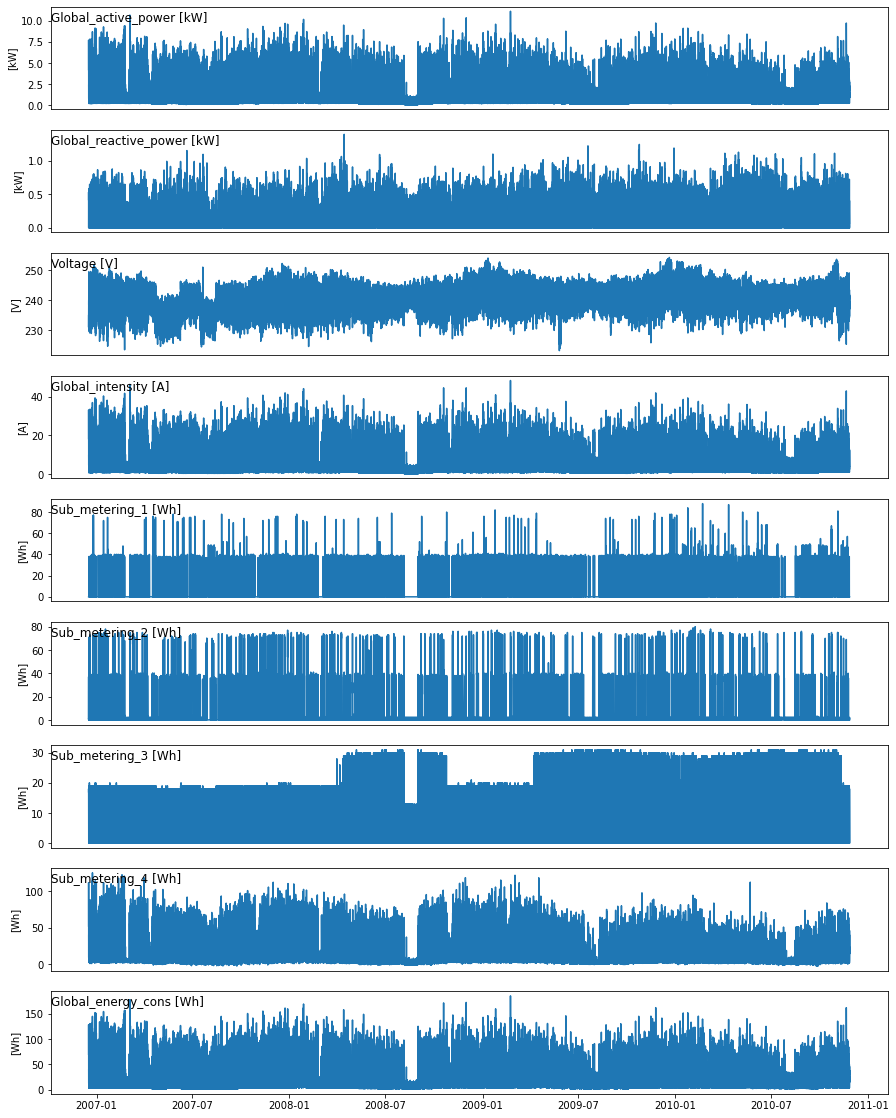

In [24]:
fig, ax = plt.subplots(len(variables), 1, figsize=(15,20))

for var, unit in variables.items():
    plt_num = list(variables).index(var)
    plt_title = " ".join((var, unit))
    #yticks = np.linspace(round(min(dataset[var])),round(max(dataset[var]),0),5)
    ax[plt_num].plot(dataset[var])
    ax[plt_num].set_title(plt_title, y=0.8, loc='left')
    ax[plt_num].grid(visible=None)
    ax[plt_num].set_ylabel(unit)
    #ax[plt_num].yaxis.set_major_locator(MaxNLocator(6))
    ax[plt_num].yaxis.set_major_locator(AutoLocator())
    #ax[plt_num].set_yticks(yticks)
    if plt_num < len(variables)-1:
        ax[plt_num].set_xticks([])

plt.show()

Clearly, this doesn't help us much in trying to understand the data. So let's see how the values of each variable are distributed with a histogram plot. It is also a good idea to distinguish between the variables representing instantaneous rate of consumption (i.e. units [kW], [V] and [A]) and cumulative values of energy consumption (units [Wh]).

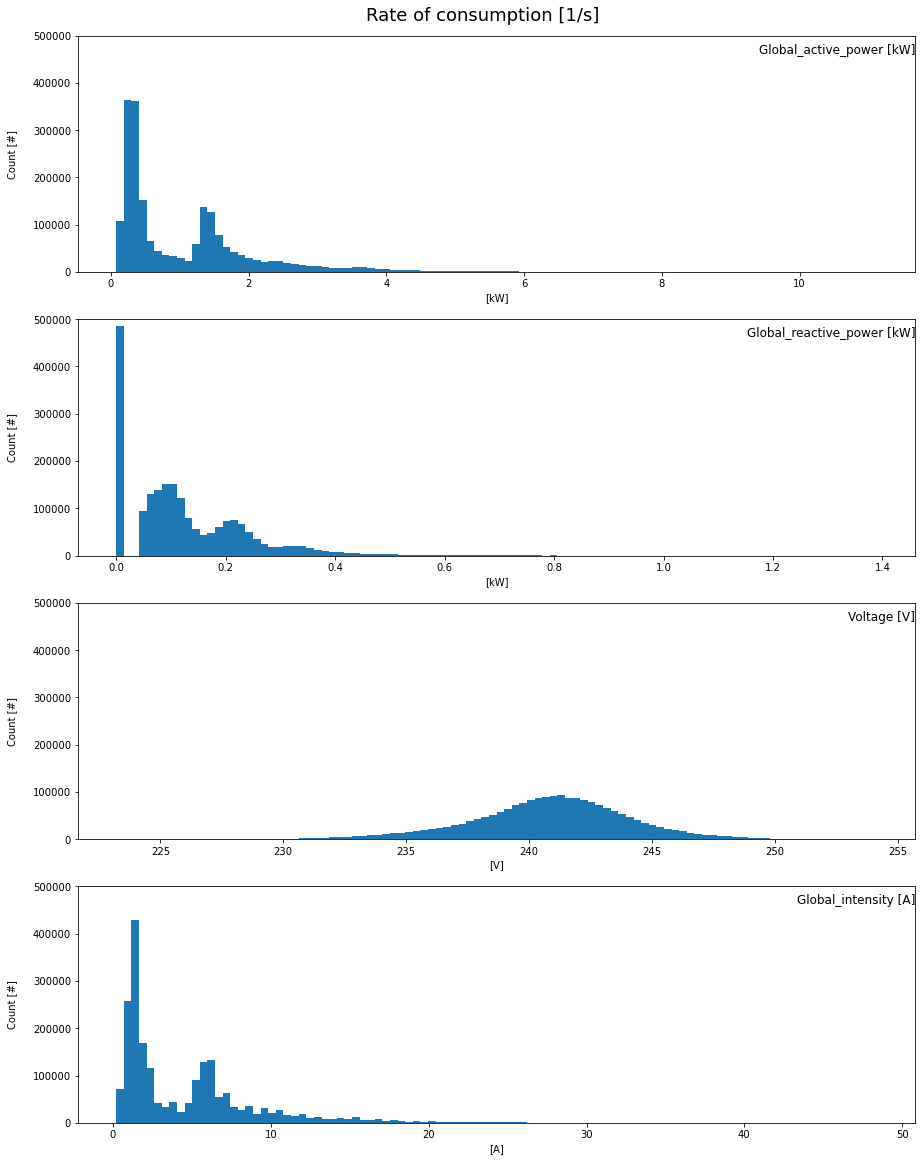

In [47]:
fig, ax = plt.subplots(len(rate_var), 1, figsize=(15,20))
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Rate of consumption [1/s]', fontsize=18, y=0.9)

for var, unit in rate_var.items():
    plt_num = list(rate_var).index(var)
    plt_title = " ".join((var, unit))
    ax[plt_num].hist(dataset[var], bins=100)
    ax[plt_num].set_title(plt_title, y=0.9, loc='right')
    ax[plt_num].grid(visible=None)
    ax[plt_num].set_ylim(0, 500000)
    ax[plt_num].set_xlabel(unit)
    ax[plt_num].set_ylabel('Count [#]\n')

plt.show()

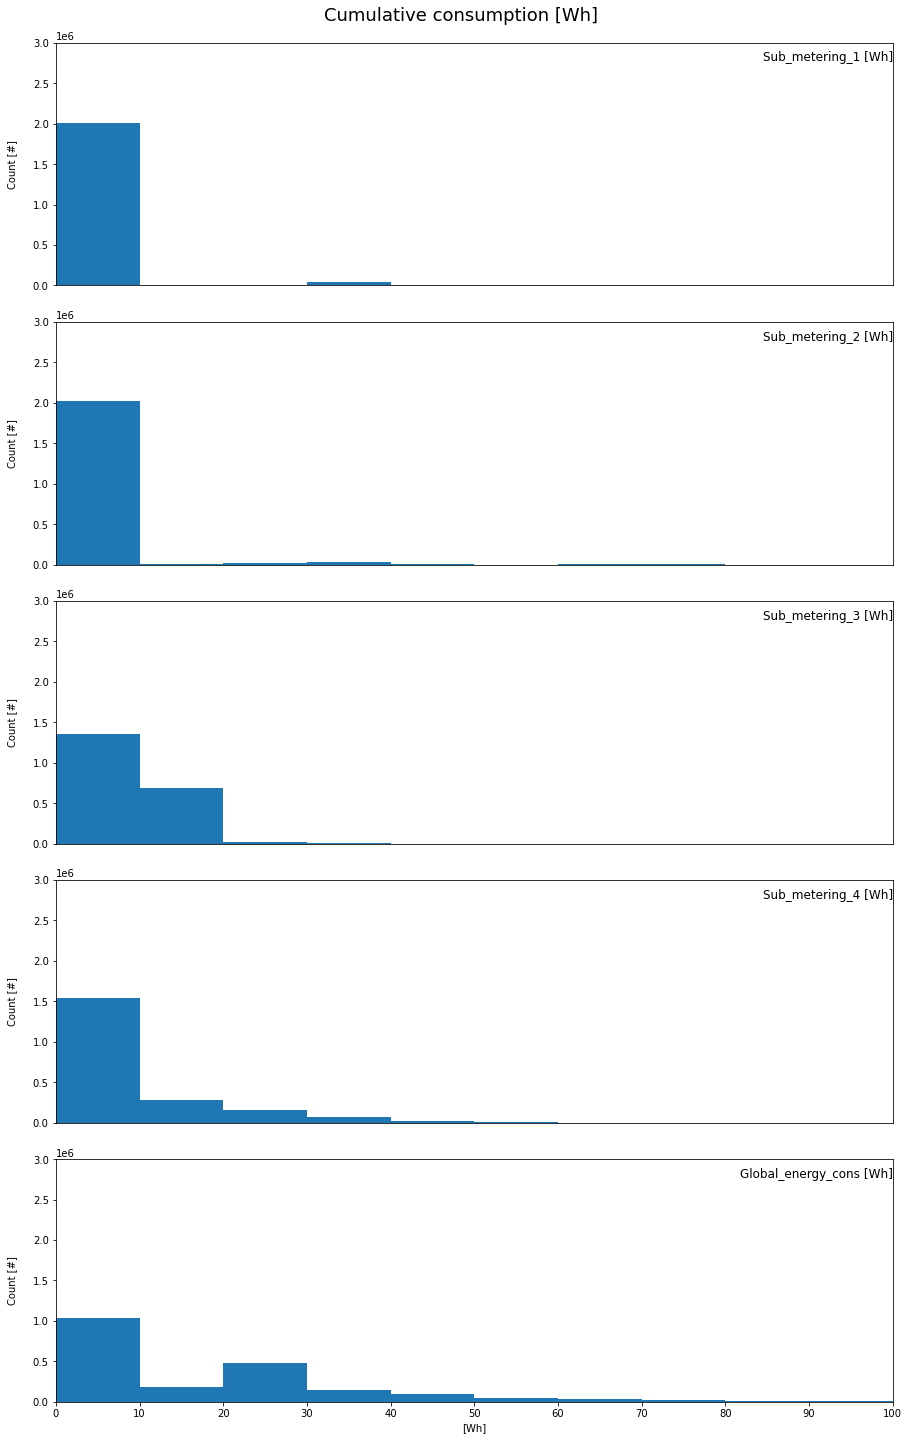

In [48]:
fig, ax = plt.subplots(len(cum_var), 1, figsize=(15,25))
plt.subplots_adjust(hspace=0.15)
fig.suptitle('Cumulative consumption [Wh]', fontsize=18, y=0.9)

for var, unit in cum_var.items():
    plt_num = list(cum_var).index(var)
    plt_title = " ".join((var, unit))
    ax[plt_num].hist(dataset[var], bins=np.arange(0, 110, 10))
    ax[plt_num].set_title(plt_title, y=0.9, loc='right')
    ax[plt_num].grid(visible=None)
    ax[plt_num].set_xlim(0, 100)
    ax[plt_num].set_ylim(0, 3e6)
    ax[plt_num].set_ylabel('Count [#]\n')
    if plt_num < len(variables)-1:
        ax[plt_num].set_xticks([])

plt.xticks(np.arange(0, 110, 10))
plt.xlabel('[Wh]')    
plt.show()

Let us check the energy consumption varies over the four years.

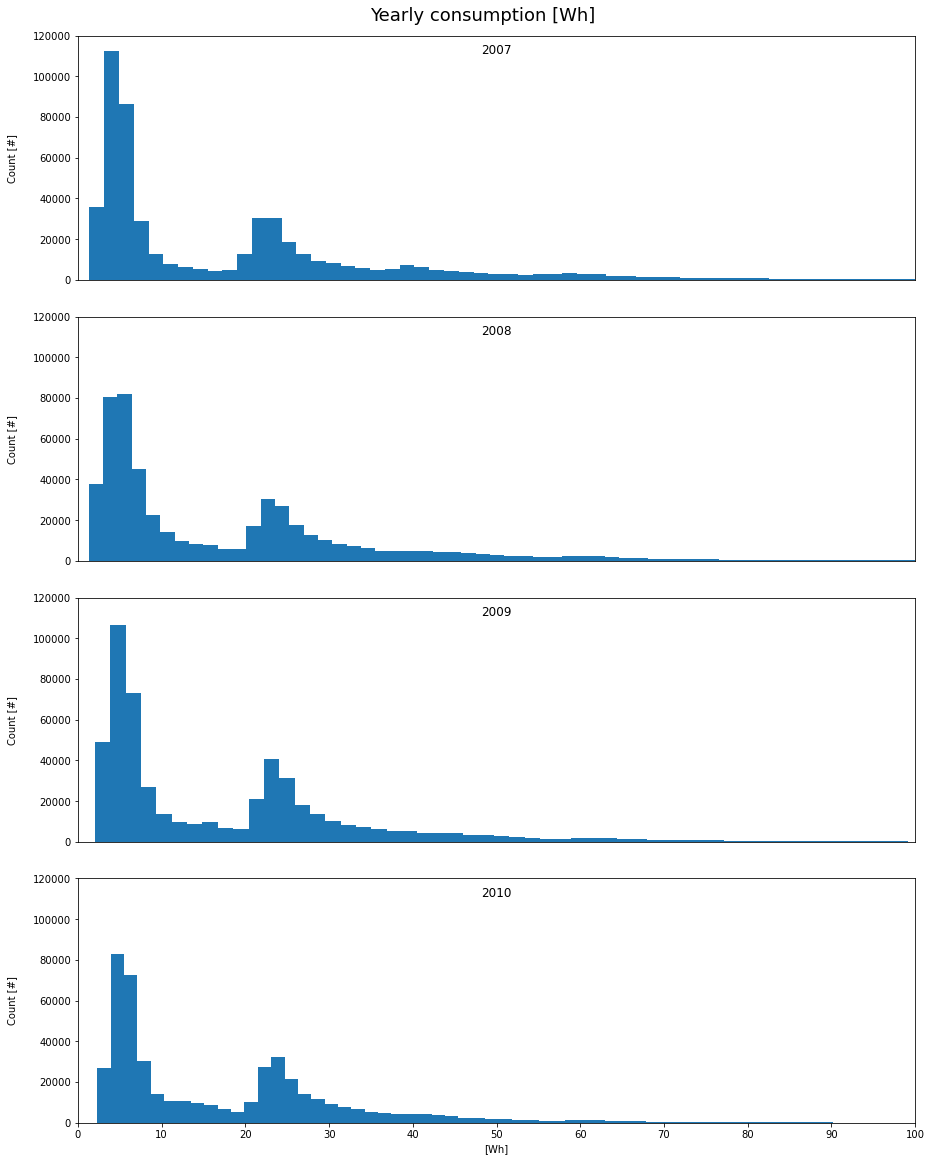

In [49]:
fig, ax = plt.subplots(len(years), 1, figsize=(15,20))
plt.subplots_adjust(hspace=0.15)
fig.suptitle('Yearly consumption [Wh]', fontsize=18, y=0.9)

for i, year in enumerate(years):
    result = dataset.loc[str(year)]
    ax[i].hist(result['Global_energy_cons'], bins=100)
    ax[i].set_title(str(year), y=0.9)
    ax[i].set_ylabel('Count [#]\n')
    ax[i].grid(visible=None)
    ax[i].set_ylim(0, 1.2e5)
    ax[i].set_xlim(0, 100)
    ax[i].set_xticks([])

plt.xticks(np.arange(0, 110, 10))
plt.xlabel('[Wh]')
plt.show()

We see that power consumption trend across the years is similar. This is desirable for modelling. Let us finally have a look at how the power consumption varies across different seasons of one year, say, 2009.

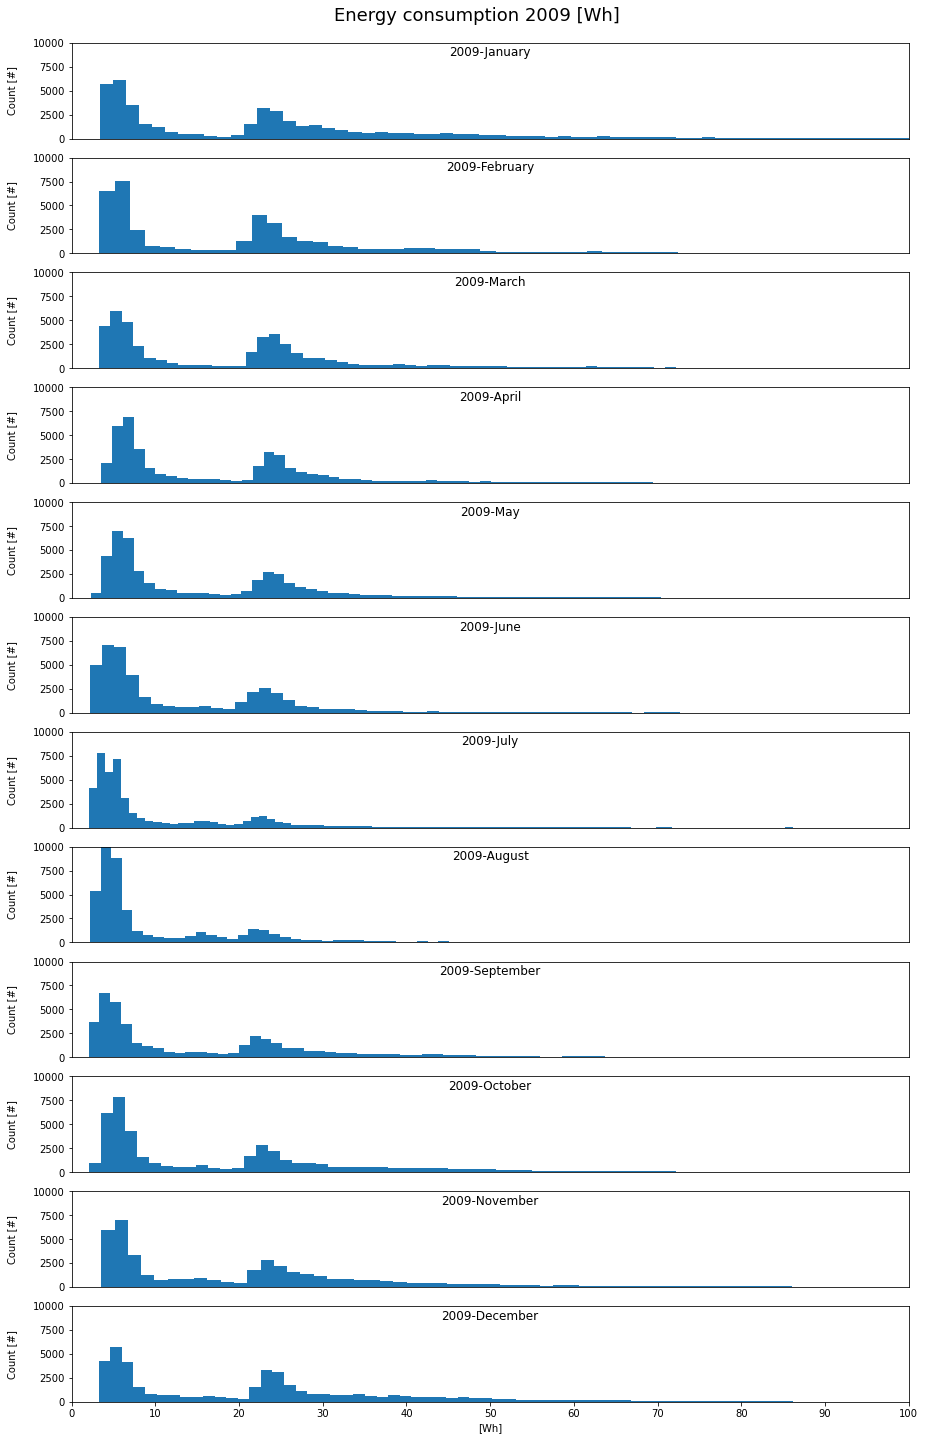

In [50]:
fig, ax = plt.subplots(len(months), 1, figsize=(15,25))
plt.subplots_adjust(hspace=0.2)
fig.suptitle('Energy consumption 2009 [Wh]', fontsize=18, y=0.9)

for i, m in months.items():
    month = '2009-' + str(i)
    result = dataset.loc[month]
    ax[i-1].hist(result['Global_energy_cons'], bins=100)
    ax[i-1].set_title('2009-'+m, y=0.8)
    ax[i-1].set_ylabel('Count [#]\n')
    ax[i-1].grid(visible=None)
    ax[i-1].set_xlim(0, 100)
    ax[i-1].set_ylim(0, 10000)
    ax[i-1].set_xticks([])

plt.xticks(np.arange(0, 110, 10))
plt.xlabel('[Wh]')
plt.show()

That looks great. The variation across the months looks realistic due to changing weather conditions.

# Data pre-processing

As noted in the introduction, this dataset consists over 2 million measurements recorded every minute. Typically, electricity consumption values are interesting in the order of per day, week or month. Hence, it makes sense to aggregate the values in the dataset with their respective days, weeks or months. Here we shall group them into daily and monthly data.

In [13]:
data_group_sum = dataset.drop(['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity'], axis=1)
data_group_avg = dataset.drop(['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_4', 'Global_energy_cons'], axis=1)

## Daily data

We aggregate the daily data by resampling the dataset by 'D'.

In [14]:
daily_data_avg = data_group_avg.resample('D').mean()
daily_data_sum = data_group_sum.resample('D').sum()

In [15]:
daily_data = pd.concat([daily_data_avg, daily_data_sum], axis=1)

In [16]:
daily_data = daily_data.where(daily_data['Global_active_power'].notna(), daily_data['Global_active_power'], axis=1)

In [17]:
null_data = daily_data[daily_data['Global_active_power'].isnull()]
null_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,


In [18]:
daily_data.shape

(1442, 9)

In [19]:
daily_data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,1.090413,0.123667,240.834072,4.622686,1609.656033,1858.135229,9280.574202,13382.285695,26130.651160
std,0.417962,0.033849,2.044201,1.730959,1581.726035,2085.161400,3674.915577,6071.784573,9955.114270
min,0.173818,0.057811,231.088229,0.808333,0.000000,0.000000,1288.000000,2313.633347,4171.633347
25%,0.816802,0.099349,240.095785,3.510694,700.000000,432.500000,6681.000000,9400.766630,19603.250001
50%,1.073969,0.118888,240.957938,4.544306,1119.000000,696.000000,9272.000000,12634.699992,25720.883338
75%,1.318014,0.140659,241.863450,5.534236,2201.750000,2732.000000,11764.000000,16498.224993,31574.458318
max,3.314851,0.290163,247.435007,14.028056,11178.000000,12109.000000,23743.000000,61736.433390,79556.433390


In [20]:
daily_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.0,546.0,4926.0,14680.933324,20152.933324
2006-12-17,2.354486,0.156949,240.087028,9.999028,2033.0,4187.0,13341.0,36946.666698,56507.666698
2006-12-18,1.530435,0.112356,241.231695,6.421667,1063.0,2621.0,14018.0,19028.433326,36730.433326
2006-12-19,1.157079,0.104821,241.999312,4.926389,839.0,7602.0,6197.0,13131.900017,27769.900017
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.0,2648.0,14063.0,20384.799998,37095.799998


In [21]:
daily_data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,
2010-11-22,1.417733,0.098857,240.197118,6.014167,4855.0,2110.0,10136.0,16924.600016,34025.600016
2010-11-23,1.095511,0.095451,240.575528,4.674444,1871.0,458.0,7611.0,16352.266649,26292.266649
2010-11-24,1.247394,0.091986,240.030965,5.249583,1096.0,2848.0,12224.0,13769.466714,29937.466714
2010-11-25,0.993864,0.080644,241.536257,4.169444,1076.0,426.0,5072.0,17278.733353,23852.733353
2010-11-26,1.178230,0.095666,240.291029,4.956295,1080.0,385.0,9989.0,13347.733353,24801.733353


Let's save this to a seperate .csv file to work on it later.

In [25]:
daily_data.to_csv('household_power_consumption_daily.csv')

## Monthly data

We aggregate the monthly data by resampling the dataset by 'M'.

In [52]:
monthly_data_avg = data_group_avg.resample('M').mean()
monthly_data_sum = data_group_sum.resample('M').sum()

In [53]:
monthly_data = pd.concat([monthly_data_avg, monthly_data_sum], axis=1)

In [55]:
monthly_data = monthly_data.where(monthly_data['Global_active_power'].notna(), monthly_data['Global_active_power'], axis=1)

In [56]:
null_data = monthly_data[monthly_data['Global_active_power'].isnull()]
null_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,


In [57]:
monthly_data.shape

(48, 9)

In [58]:
monthly_data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
count,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,4.800000e+01
mean,1.099551,0.123605,240.845026,4.660633,48356.75000,55821.479167,278803.916667,402026.166085,7.850083e+05
std,0.298203,0.021848,1.568441,1.213541,15094.24296,16495.136025,68156.360515,130479.273312,1.992296e+05
min,0.276486,0.087162,235.178364,1.263566,3873.00000,22264.000000,79667.000000,99901.666959,2.057057e+05
25%,0.965490,0.109518,240.358042,4.140453,43204.25000,44546.500000,228902.250000,309527.316869,6.944519e+05
50%,1.124279,0.124917,240.881712,4.718026,48154.00000,53551.000000,290499.500000,403321.266520,8.092069e+05
75%,1.280231,0.131734,241.740054,5.362186,57919.00000,64157.750000,318646.750000,479296.091615,9.250887e+05
max,1.901562,0.188118,244.082310,8.031051,75737.00000,104762.000000,421978.000000,690635.633318,1.210080e+06


In [59]:
monthly_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,
2006-12-31,1.901562,0.131384,241.440851,8.031051,27460.0,48783.0,163022.0,457847.533568,6.971125e+05
2007-01-31,1.546032,0.132675,240.905072,6.546900,56433.0,79275.0,329596.0,684943.866812,1.150248e+06
2007-02-28,1.401135,0.113644,240.519562,5.914772,47586.0,64607.0,270310.0,559059.733630,9.415627e+05
2007-03-31,1.318649,0.114748,240.513393,5.573069,60769.0,104762.0,290378.0,525165.533379,9.810745e+05
2007-04-30,0.874539,0.118122,239.036318,3.758731,45622.0,39878.0,201183.0,342984.900073,6.296679e+05


In [60]:
monthly_data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,
2010-07-31,0.721079,0.165478,240.548055,3.130856,17667.0,34359.0,192912.0,291544.466775,536482.466775
2010-08-31,0.632347,0.125153,241.190046,2.729525,17199.0,30888.0,190186.0,232193.333628,470466.333628
2010-09-30,0.953431,0.125611,241.122462,4.054199,43687.0,35166.0,292733.0,314883.966923,686469.966923
2010-10-31,1.163416,0.137563,242.159360,4.889082,48201.0,60222.0,315688.0,441470.133336,865581.133336
2010-11-30,1.196854,0.110799,240.721888,5.057709,46162.0,42282.0,247113.0,407749.466762,743306.466762


In [61]:
monthly_data.to_csv('household_power_consumption_monthly.csv')

# Modeling

Let us now get to the best part - modeling! Let us import the necessary libraries first.

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [64]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_predict
from pmdarima import auto_arima
import warnings # Ignore harmless warnings
warnings.filterwarnings("ignore")

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt

## Modeling daily data

Let us read the daily data afresh.

In [66]:
daily_data = read_csv('household_power_consumption_daily.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

In [67]:
daily_data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,1.090413,0.123667,240.834072,4.622686,1609.656033,1858.135229,9280.574202,13382.285695,26130.651160
std,0.417962,0.033849,2.044201,1.730959,1581.726035,2085.161400,3674.915577,6071.784573,9955.114270
min,0.173818,0.057811,231.088229,0.808333,0.000000,0.000000,1288.000000,2313.633347,4171.633347
25%,0.816802,0.099349,240.095785,3.510694,700.000000,432.500000,6681.000000,9400.766630,19603.250001
50%,1.073969,0.118888,240.957938,4.544306,1119.000000,696.000000,9272.000000,12634.699992,25720.883338
75%,1.318014,0.140659,241.863450,5.534236,2201.750000,2732.000000,11764.000000,16498.224993,31574.458318
max,3.314851,0.290163,247.435007,14.028056,11178.000000,12109.000000,23743.000000,61736.433390,79556.433390


In [68]:
daily_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.0,546.0,4926.0,14680.933324,20152.933324
2006-12-17,2.354486,0.156949,240.087028,9.999028,2033.0,4187.0,13341.0,36946.666698,56507.666698
2006-12-18,1.530435,0.112356,241.231695,6.421667,1063.0,2621.0,14018.0,19028.433326,36730.433326
2006-12-19,1.157079,0.104821,241.999312,4.926389,839.0,7602.0,6197.0,13131.900017,27769.900017
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.0,2648.0,14063.0,20384.799998,37095.799998


In [69]:
daily_data.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4,Global_energy_cons
datetime,,,,,,,,,
2010-11-22,1.417733,0.098857,240.197118,6.014167,4855.0,2110.0,10136.0,16924.600016,34025.600016
2010-11-23,1.095511,0.095451,240.575528,4.674444,1871.0,458.0,7611.0,16352.266649,26292.266649
2010-11-24,1.247394,0.091986,240.030965,5.249583,1096.0,2848.0,12224.0,13769.466714,29937.466714
2010-11-25,0.993864,0.080644,241.536257,4.169444,1076.0,426.0,5072.0,17278.733353,23852.733353
2010-11-26,1.178230,0.095666,240.291029,4.956295,1080.0,385.0,9989.0,13347.733353,24801.733353


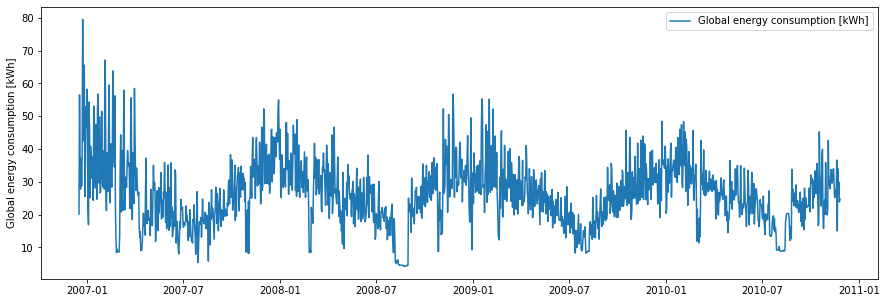

In [81]:
# Plot daily data
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(daily_data['Global_energy_cons']/1000, label='Global energy consumption [kWh]')
ax.set_ylabel('Global energy consumption [kWh]')
plt.legend()
plt.show()

We see that we have a total of 1442 days or 206 weeks. We will use the first three years of data for training predictive models and the final year for evaluating models. The data in a given dataset will be divided into standard weeks. These are weeks that begin on a Sunday and end on a Saturday. This is a realistic and useful way for using the chosen framing of the model, where the power consumption for the week ahead can be predicted.

In [70]:
days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

We see from the calender that the first Sunday in the dataset is December 17th 2006, which is the second row of data. We further note that the first Sunday of 2010 is January 3rd 2010 and the last Saturday of 2010 is November 20th 2010. Let us find their indices.

In [72]:
print(('The index of the first Sunday in the training set is').ljust(54), ': %d' % daily_data.index.get_loc('2006-12-17'))
print(('The index of the last Saturday in the training set is').ljust(54),': %d (%d)' % (daily_data.index.get_loc('2010-01-02'), (daily_data.index.get_loc('2010-01-02')-1442)))
print(('The index of the first Sunday in the test set is').ljust(54), ': %d (%d)' % (daily_data.index.get_loc('2010-01-03'), (daily_data.index.get_loc('2010-01-03')-1442)))
print(('The index of the last Saturday in the test set is').ljust(54), ': %d' % daily_data.index.get_loc('2010-11-20'))

The index of the first Sunday in the training set is   : 1
The index of the last Saturday in the training set is  : 1113 (-329)
The index of the first Sunday in the test set is       : 1114 (-328)
The index of the last Saturday in the test set is      : 1435


## Statistical tests

Let us check the data for stationarity with the Augmented Dickey-Fuller test.

In [76]:
result = adfuller(daily_data['Global_energy_cons'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('\nCritical Values:')
for key, value in result[4].items():
  print('%s: %.3f' % (key, value))

ADF Statistic: -3.697385
p-value: 0.004150

Critical Values:
1%: -3.435
5%: -2.864
10%: -2.568


Since the p-value < 0.05 the null hypothesis is confirmed, and hence the data is stationary.

Now let us plot the auto-correlation function (ACF) and partial auto-correlation function (PACF) to estimate the parameters for the SARIMAX model.

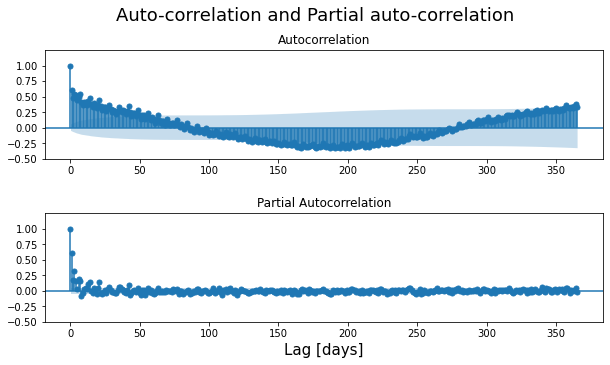

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(10,5))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Auto-correlation and Partial auto-correlation\n', fontsize=18, y=1)

lags = 365
# acf
#ax[0].set_xticks([])
plot_acf(daily_data['Global_energy_cons'], ax=ax[0], lags=lags)
ax[0].set_ylim(-0.5, 1.25)
ax[0].set_yticks(np.arange(-0.5, 1.25, 0.25))

# pacf
plot_pacf(daily_data['Global_energy_cons'], ax=ax[1], lags=lags, method='ywm')
ax[1].set_ylim(-0.5, 1.25)
ax[1].set_yticks(np.arange(-0.5, 1.25, 0.25))
# show plot
plt.xlabel('Lag [days]', fontsize=15)
plt.show()

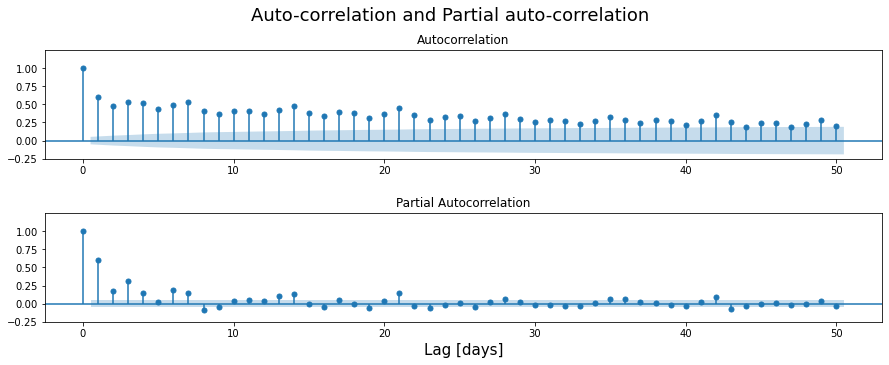

In [78]:
fig, ax = plt.subplots(2, 1, figsize=(15,5))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Auto-correlation and Partial auto-correlation\n', fontsize=18, y=1)

lags = 50
# acf
plot_acf(daily_data['Global_energy_cons'], ax=ax[0], lags=lags)
ax[0].set_ylim(-0.25, 1.25)
ax[0].set_yticks(np.arange(-0.25, 1.25, 0.25))

# pacf
plot_pacf(daily_data['Global_energy_cons'], ax=ax[1], lags=lags, method='ywm')
ax[1].set_ylim(-0.25, 1.25)
ax[1].set_yticks(np.arange(-0.25, 1.25, 0.25))
# show plot
plt.xlabel('Lag [days]', fontsize=15)
plt.show()

We see from the PACF that the 'p' value for the data is less than 7. This will help us set the parameter during modeling.

Let us now split the dataset into training and test sets and restructure the data into weekly data of 7 days at a time.

In [73]:
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = np.array(np.split(train, len(train)/7))
    test = np.array(np.split(test, len(test)/7))
    return train, test

In [74]:
# split into train and test
train, test = split_dataset(daily_data['Global_energy_cons'].values)

In [75]:
print(train.shape)
print(test.shape)

(159, 7)
(46, 7)


In [83]:
def to_series(data):
    # extract just the total power from each week
    series = [week[:] for week in data]
    # flatten into a single series
    series = np.array(series).flatten()
    return series

In [84]:
auto_sarima_fit = auto_arima(to_series(train), start_p = 3, start_q = 0,
                          max_p = 7, max_q = 3, m = 7,
                          start_P = 0, seasonal = True,
                          d = None, D = None, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(3,1,0)(0,0,1)[7] intercept   : AIC=23077.379, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=23473.355, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=23278.864, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=23084.046, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=23471.368, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[7] intercept   : AIC=23099.919, Time=0.22 sec
 ARIMA(3,1,0)(1,0,1)[7] intercept   : AIC=22963.971, Time=1.43 sec
 ARIMA(3,1,0)(1,0,0)[7] intercept   : AIC=23070.728, Time=0.41 sec
 ARIMA(3,1,0)(2,0,1)[7] intercept   : AIC=22965.204, Time=2.03 sec
 ARIMA(3,1,0)(1,0,2)[7] intercept   : AIC=22965.213, Time=1.78 sec
 ARIMA(3,1,0)(0,0,2)[7] intercept   : AIC=23064.815, Time=0.55 sec
 ARIMA(3,1,0)(2,0,0)[7] intercept   : AIC=23048.732, Time=0.75 sec
 ARIMA(3,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=5.08 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=23002.285, Time=0.96 sec
 ARIMA(4,1,0)(1,0,1)[7] i

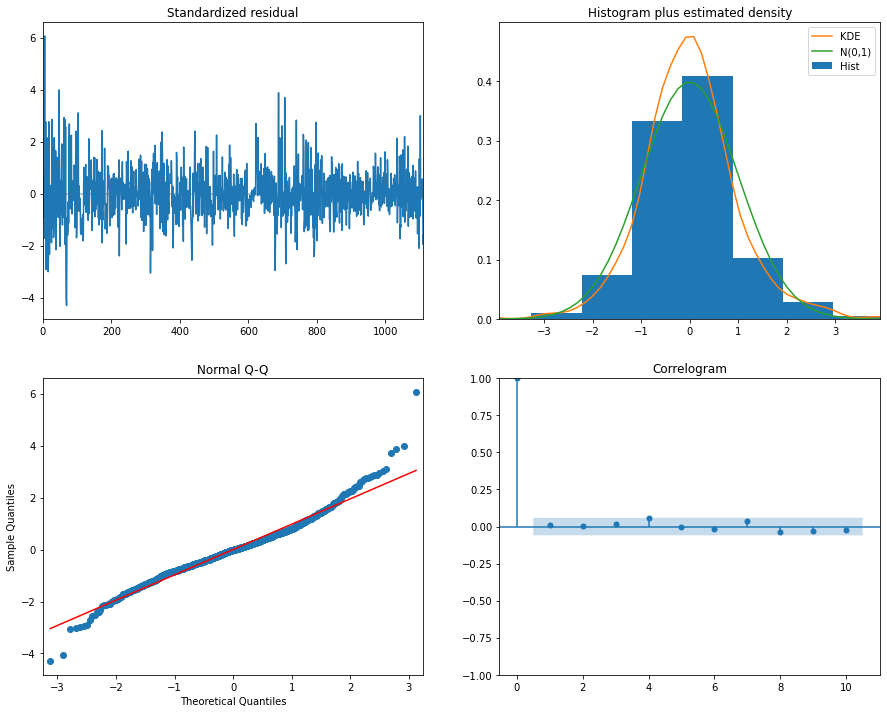

In [85]:
auto_sarima_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [86]:
# To print the summary
auto_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1113
Model:             SARIMAX(6, 1, 3)x(1, 0, [1, 2], 7)   Log Likelihood              -11431.450
Date:                                Sat, 29 Oct 2022   AIC                          22888.899
Time:                                        15:48:56   BIC                          22954.080
Sample:                                             0   HQIC                         22913.544
                                               - 1113                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9978      0.050    -20.136      0.000      -1.095      -0.901
ar.L2         -0.9797      0.054    -18.291      0.000      -1.085      -0.875
ar.L3         -0.9900      0.067    -14.786      0.000      -1.121      -0.859
ar.L4         -0.7517      0.051    -14.814      0.000      -0.851      -0.652
ar.L5         -0.6946      0.043    -16.238      0.000      -0.778      -0.611
ar.L6         -0.5180      0.044    -11.785      0.000      -0.604      -0.432
ma.L1          0.3646      0.055      6.577      0.000       0.256       0.473
ma.L2          0.1509      0.052      2.925      0.003       0.050       0.252
ma.L3          0.2532      0.052      4.865      0.000       0.151       0.355
ar.S.L7        0.9682      0.014     71.565      0.000       0.942       0.995
ma.S.L7       -1.3733      0.054    -25.422      0.000      -1.479      -1.267
ma.S.L14       0.4345      0.048      9.051      0.000       0.340       0.529
sigma2      5.213e+07   6.93e-10   7.52e+16      0.000    5.21e+07    5.21e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               374.05
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.33e+32. Standard errors may be unstable.
"""

In [88]:
def sarima_forecast(history):
    # convert history into a univariate series
    series = to_series(history)
    # define the model
    model = SARIMAX(series, order=(6,1,3), seasonal_order=(1,0,2,7))
    # fit the model
    model_fit = model.fit()
    # make forecast
    yhat = model_fit.predict(len(series), len(series)+6)
    return yhat

In [89]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    
    # calculate an RMSE score for each day
    scores = list()
    for i in range(actual.shape[1]):
    # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
        score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

In [90]:
def evaluate_model(model_func, train, test):
    # history is a list of weekly data
    history = [x for x in train]
    
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = model_func(history)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    
    predictions = np.array(predictions)
    # evaluate predictions days for each week
    score, scores = evaluate_forecasts(test[:, :], predictions)
    return predictions, score, scores

In [95]:
# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s performance:\nMSE weekly: %.3f Wh\n\nMSE daily %s\n[%s] Wh' % (name, score, days, s_scores))

In [92]:
models = dict()
models['SARIMA'] = sarima_forecast

In [93]:
pred_sarima, score_sarima, scores_sarima = evaluate_model(sarima_forecast, train, test)

In [96]:
summarize_scores('SARIMA', score_sarima, scores_sarima)

SARIMA performance:
MSE weekly: 6368.075 Wh

MSE daily ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
[6543.9, 6678.4, 5757.8, 6373.5, 6452.7, 5284.7, 7287.2] Wh


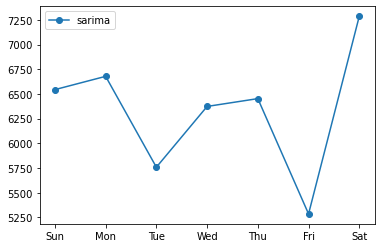

In [97]:
plt.plot(days, scores_sarima, marker='o', label='sarima')
# show plot
plt.legend()
plt.show()

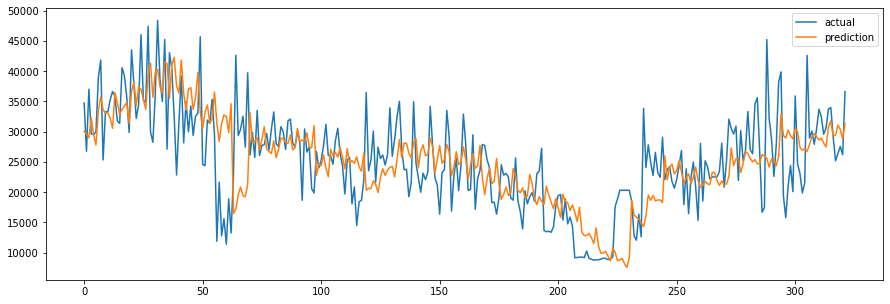

In [98]:
# Actual vs Fitted
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(to_series(test), label='actual')
ax.plot(to_series(pred_sarima), label='prediction')
plt.legend()
plt.show()